# Smoothing of BaySeg data

Smoothing needs to be applied to the output data of BaySeg, because GemPy requires layers which are not crossing. Meaning that layers need to be removed which occure over just a few meters

In [2]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns

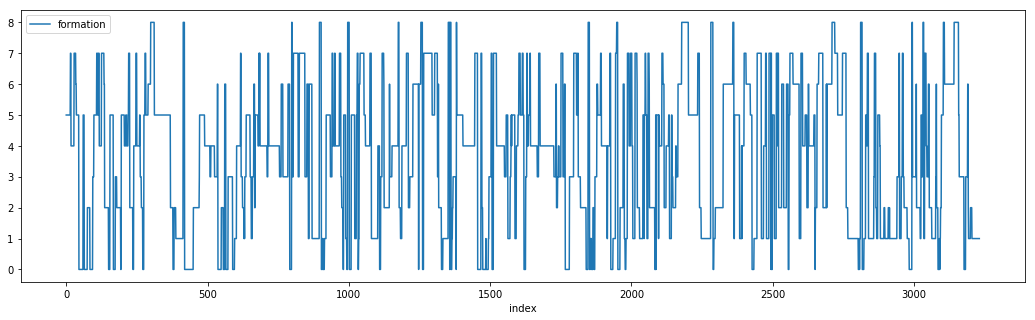

In [17]:
# import data from csv.file
gempy = pd.read_csv("Gempy_input_all_for_smoothing.csv")
gempy.reset_index().plot(x='index', y='formation',figsize = (18,5))

In [18]:
# smoothing 
for k in range(1,len(gempy)-1):
    if gempy.loc[k,'formation'] != gempy.loc[k+1,'formation'] and gempy.loc[k,'formation'] != gempy.formation[k-1]:  # deletes 1x values
          gempy.loc[k,'formation'] = gempy.formation[k-1]
            
    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+2,'formation']: # deletes 2x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']
    
    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+3,'formation']: # deletes 3x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']
            
    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+4,'formation']: # deletes 4x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']
            
    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+5,'formation']: # deletes 5x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']

    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+6,'formation']: # deletes 6x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']
            
    elif gempy.loc[k,'formation'] != gempy.loc[k-1,'formation'] and gempy.loc[k,'formation'] != gempy.loc[k+7,'formation']: # deletes 7x values
          gempy.loc[k,'formation'] = gempy.loc[k-1,'formation']
            
    else: continue
        
gempy.loc[0,'formation'] = gempy.loc[1,'formation']     # ensures first value to be equal second

In [19]:
# Extract one point of each layer
for k in range(0,len(gempy)-1):
    if gempy.loc[k,'formation'] == gempy.loc[k+1,'formation']:
        gempy = gempy.drop(k)
gempy.index = range(len(gempy))  
gempy.formation = (gempy.formation +1) # no zero in the formation otherwise problems in gempy with plotting and strata_series

In [20]:
print(gempy)

     Unnamed: 0       X       Y       Z         borehole  formation
0            16   250.0   500.0  2801.0        SHRIMPLIN          6
1            35   250.0   500.0  2810.5        SHRIMPLIN          5
2            44   250.0   500.0  2815.0        SHRIMPLIN          6
3            74   250.0   500.0  2830.0        SHRIMPLIN          1
4            83   250.0   500.0  2834.5        SHRIMPLIN          3
5            97   250.0   500.0  2841.5        SHRIMPLIN          1
6           116   250.0   500.0  2851.0        SHRIMPLIN          6
7           124   250.0   500.0  2855.0        SHRIMPLIN          5
8           135   250.0   500.0  2860.5        SHRIMPLIN          8
9           154   250.0   500.0  2870.0        SHRIMPLIN          3
10          178   250.0   500.0  2882.0        SHRIMPLIN          6
11          194   250.0   500.0  2890.0        SHRIMPLIN          3
12          224   250.0   500.0  2905.0        SHRIMPLIN          6
13          238   250.0   500.0  2912.0        S

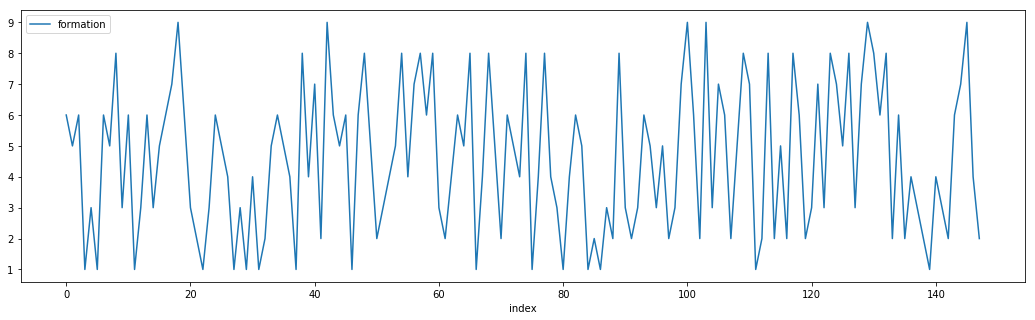

In [14]:
gempy.reset_index().plot(x='index', y='formation',figsize = (18,5))

In [23]:
# create global variables for each borehole
well_names = list(set(gempy['borehole']))    # list with all well names, but just once (8 boreholes)

for i in range(0,len(well_names)):    # range from 0-8 (8 boreholes) 
    a =(np.where(gempy['borehole'] == well_names[i]))
    #globals()['%s' %(well_names[i])] = gempy[a[0]:a[-1]]

    boreholes = pd.DataFrame({'%s'%(well_names[i]): i})

ValueError: If using all scalar values, you must pass an index

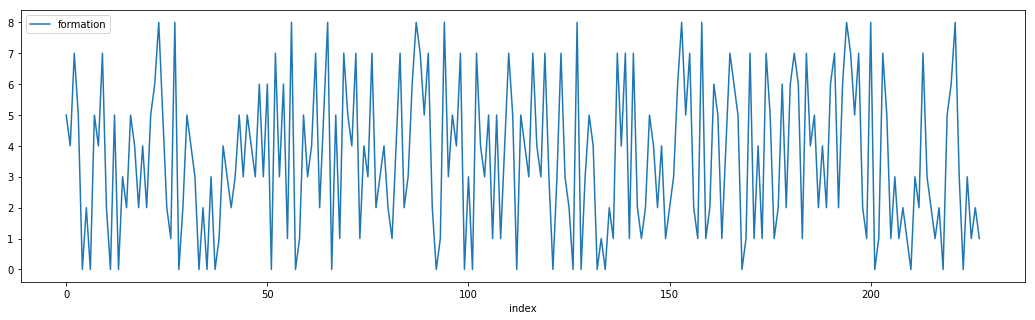

In [8]:
gempy.reset_index().plot(x='index', y='formation',figsize = (18,5))